# Question 1 - Importing Data Set

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path

path = r"C:\Users\caden\OneDrive\Desktop\Instacart Basket Analysis 06.22.2022"

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'df_use_this_one.pkl'))

# Question 2 - Security Implications

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'order_frequency', 'order_frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [5]:
# Dropping columns with first and last names due to PII

df = df.drop(columns = ['first_name', 'last_name'])

In [6]:
# Check

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'order_frequency', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

# Question 3 - Customer Behavior in Geographic Regions

In [7]:
# Defining regions

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [8]:
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [9]:
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [10]:
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [11]:
# Creating loop for region column

result=[]

for state in df['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [12]:
# Adding column to data set

df['region']=result

In [14]:
# Check region value counts

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [15]:
# Create crosstab for regional spending

regional_spending_crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [16]:
regional_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [18]:
# Creating percentage for spending

Midwest_high_spenders = (155975 / (155975+7441350)) * 100
Northeast_high_spenders = (108225 / (108225+5614511)) * 100
South_high_spenders = (209691 / (209691+10582194)) * 100
West_high_spenders = (160354 / (160354+8132559)) * 100

In [19]:
Midwest_high_spenders

2.053025242437305

In [20]:
Northeast_high_spenders

1.8911408808653762

In [21]:
South_high_spenders

1.9430433144904713

In [22]:
West_high_spenders

1.9336269414619447

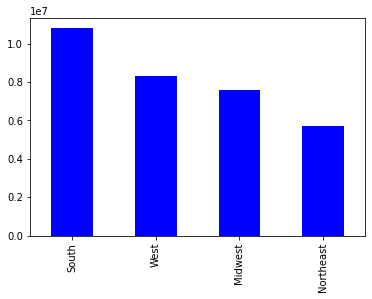

In [25]:
# Bar chart of spending

regional_bar = df['region'].value_counts().plot.bar(color =['blue'])

### The South spends the most but the highest percentage of high spenders are located in the Midwest

In [27]:
# Exporting image

regional_bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'regional_spending_bar.png'))

# Question 4 - Exclusion flag for low-activity customers

In [28]:
# Create low activity flag

df.loc[df['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [29]:
# Create normal activity flag

df.loc[df['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [33]:
# Check the count of activity flag

df['activity_flag'].value_counts(dropna = False)

Normal activity    30964564
Low activity        1440295
Name: activity_flag, dtype: int64

In [34]:
# Create low-activity subset

df_low_activity = df[df['activity_flag']=='Low activity']

In [35]:
# Check to ensure values match

df_low_activity.shape

(1440295, 32)

In [36]:
# Create normal-activity subset

df_normal_activity = df[df['activity_flag']=='Normal activity']

In [37]:
# Check

df_normal_activity.shape

(30964564, 32)

In [38]:
# Export low activity subset

df_low_activity.to_pickle(os.path.join(path,'02. Data','Prepared Data','low_activity_customers.pkl'))

# Question 5 - Customer Profiling

### Age


In [39]:
# Age values

df_normal_activity['age'].value_counts().sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: age, Length: 64, dtype: int64

In [44]:
# Creating loop for age column

age_profile = []

for value in df_normal_activity['age']:
    if (value >= 18) and (value <= 24):
        age_profile.append('Young Adult')
    elif (value >= 25) and (value <= 64):
        age_profile.append('Adult')
    elif (value >= 65):
        age_profile.append('Senior')

In [45]:
# Create column for age_profile

df_normal_activity['age_profile'] = age_profile

C:\Users\caden\AppData\Local\Temp\ipykernel_14420\4063005250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['age_profile'] = age_profile


In [47]:
# Check age_profile values

df_normal_activity['age_profile'].value_counts().sort_index()

Adult          19353826
Senior          8195544
Young Adult     3415194
Name: age_profile, dtype: int64

### Income

In [48]:
# Check income values

df_normal_activity['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 96069, dtype: int64

### Source to define income groups: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

In [49]:
# Creating loop for income column, groups based off of a household size of 3

income_profile = []

for value in df_normal_activity['income']:
    if (value < 52200):
        income_profile.append('Lower income')
    elif (value >= 52200) & (value < 156600):
        income_profile.append('Middle income')
    else:
        income_profile.append('Upper income')

In [50]:
# Create column for income_profile

df_normal_activity['income_profile'] = income_profile

C:\Users\caden\AppData\Local\Temp\ipykernel_14420\4043511981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['income_profile'] = income_profile


In [51]:
# Check income_profile values

df_normal_activity['income_profile'].value_counts().sort_index()

Lower income      3691708
Middle income    24541333
Upper income      2731523
Name: income_profile, dtype: int64

### Goods

In [54]:
# Create loop for "goods" using dept_id

goods_profile = []

for value in df_normal_activity['department_id']:
    if value == 1:
        goods_profile.append('Frozen')
    elif value == 2:
        goods_profile.append('Other')
    elif value == 3:
        goods_profile.append('Bakery')
    elif value == 4:
        goods_profile.append('Produce')
    elif value == 5:
        goods_profile.append('Alcohol')
    elif value == 6:
        goods_profile.append('International')
    elif value == 7:
        goods_profile.append('Beverages')
    elif value == 8:
        goods_profile.append('Pets')
    elif value == 9:
        goods_profile.append('Dry goods pasta')
    elif value == 10:
        goods_profile.append('Bulk')
    elif value == 11:
        goods_profile.append('Personal care')
    elif value == 12:
        goods_profile.append('Meat seafood')
    elif value == 13:
        goods_profile.append('Pantry')
    elif value == 14:
        goods_profile.append('Breakfast')
    elif value == 15:
        goods_profile.append('Canned goods')
    elif value == 16:
        goods_profile.append('Dairy eggs')
    elif value == 17:
        goods_profile.append('Household')
    elif value == 18:
        goods_profile.append('Babies')
    elif value == 19:
        goods_profile.append('Snacks')
    elif value == 20:
        goods_profile.append('Deli')
    elif value == 21:
        goods_profile.append('Missing')

In [55]:
# Create column for goods

df_normal_activity['goods_profile'] = goods_profile

C:\Users\caden\AppData\Local\Temp\ipykernel_14420\1614328652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['goods_profile'] = goods_profile


In [57]:
# Check goods_profile values

df_normal_activity['goods_profile'].value_counts().sort_index()

Alcohol             144627
Babies              410392
Bakery             1120828
Beverages          2571901
Breakfast           670850
Bulk                 33451
Canned goods       1012074
Dairy eggs         5177182
Deli               1003834
Dry goods pasta     822136
Frozen             2121731
Household           699857
International       255991
Meat seafood        674781
Missing              64768
Other                34411
Pantry             1782705
Personal care       424306
Pets                 93060
Produce            9079273
Snacks             2766406
Name: goods_profile, dtype: int64

### Dependants

In [59]:
# Check dependants

df_normal_activity['number_of_dependants'].value_counts().sort_index()

0    7739681
1    7719106
2    7733261
3    7772516
Name: number_of_dependants, dtype: int64

In [60]:
# Creating loop for dependants columns

dependants_profile = []

for value in df_normal_activity['number_of_dependants']:
    if (value == 0):
        dependants_profile.append('No dependants')
    else:
        dependants_profile.append('Dependants')

In [62]:
# Assign dependants profile to column

df_normal_activity['dependants_profile'] = dependants_profile

C:\Users\caden\AppData\Local\Temp\ipykernel_14420\1735883293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['dependants_profile'] = dependants_profile


In [63]:
# Check dependants profile

df_normal_activity['dependants_profile'].value_counts().sort_index()

Dependants       23224883
No dependants     7739681
Name: dependants_profile, dtype: int64

### Creating profiles based off of age, income, and # of dependants

In [64]:
# Creating customer profiles

df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Young Adult lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Young Adult middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Young Adult upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Adult lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Adult middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Adult') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Adult upper income' 
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Senior Parent/Guardian lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Senior Parent/Guardian middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Senior Parent/Guardian upper income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Senior lower income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Middle income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Senior middle income'
df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Senior') & (df_normal_activity['income_profile'] == 'Upper income') & (df_normal_activity['dependants_profile'] == 'No dependants'), 'customer_profile'] = 'Senior upper income'

C:\Users\caden\AppData\Local\Temp\ipykernel_14420\3991481876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity.loc[(df_normal_activity['age_profile'] == 'Young Adult') & (df_normal_activity['income_profile'] == 'Lower income') & (df_normal_activity['dependants_profile'] == 'Dependants'), 'customer_profile'] = 'Young Parent/Guardian lower income'


### The goods profile could be used to further create more profiles but I think it's easier to omit it. If someone has a dependant then you can assume they are either a parent or guardian. If you added the goods profile and filtered for babie products you could determine if they have a younger child or older one. Additionally, with more information as to which groups of people buy more of certain products you could determine who is more likely to be single or even who has pets.

In [65]:
# Check

df_normal_activity['customer_profile'].value_counts().sort_index()

Adult lower income                        609387
Adult middle income                      3860037
Adult upper income                        422789
Parent/Guardian lower income             1760852
Parent/Guardian middle income           11495379
Parent/Guardian upper income             1205382
Senior Parent/Guardian lower income       561981
Senior Parent/Guardian middle income     4808014
Senior Parent/Guardian upper income       803591
Senior lower income                       168973
Senior middle income                     1581046
Senior upper income                       271939
Young Adult lower income                  149405
Young Adult middle income                 668546
Young Adult upper income                    7559
Young Parent/Guardian lower income        441110
Young Parent/Guardian middle income      2128311
Young Parent/Guardian upper income         20263
Name: customer_profile, dtype: int64

# Question 6 - Visualization

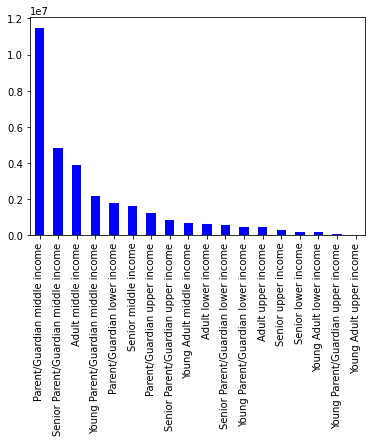

In [67]:
# Bar chart 

bar = df_normal_activity['customer_profile'].value_counts().plot.bar(color =['blue'])

In [68]:
# Export visualization

bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'customer_profile_bar.png'))

# Question 7 - Max, Mean, Min Variables

In [70]:
# Aggregated spending

df_normal_activity.groupby('customer_profile').agg({'spending': ['mean', 'min', 'max']})

spending                         
                                            mean        min           max
customer_profile                                                         
Adult lower income                      6.794283   1.000000     11.487500
Adult middle income                     9.596381   2.382759   5135.893590
Adult upper income                     40.234907   7.002308  15006.940000
Parent/Guardian lower income            6.780940   1.000000     12.000000
Parent/Guardian middle income           9.362381   1.522222   5271.136842
Parent/Guardian upper income           43.883209   7.000000   6983.593023
Senior Parent/Guardian lower income     6.507172   1.262500      7.000000
Senior Parent/Guardian middle income    9.241409   1.300000   2410.696774
Senior Parent/Guardian upper income    29.854363   7.001093   7414.485185
Senior lower income                     6.509028   1.800000      7.000000
Senior middle income                    9.498193   1.308333  14042.512281
Senior upper income                    30.021251   7.000575   2673.245778
Young Adult lower income                6.968650   2.100000     13.878571
Young Adult middle income              13.507942   7.000000   8794.882427
Young Adult upper income              148.747705  26.759379   2990.717910
Young Parent/Guardian lower income      7.028856   2.000000     11.783333
Young Parent/Guardian middle income    10.565561   7.000000   5668.766038
Young Parent/Guardian upper income    282.162977  25.849554  10209.987755

In [71]:
# Aggregated order frequency

df_normal_activity.groupby('customer_profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency            
                                                mean   min   max
customer_profile                                                
Adult lower income                         24.978436   2.0  30.0
Adult middle income                        25.190124   0.0  30.0
Adult upper income                         25.117456   3.0  30.0
Parent/Guardian lower income               24.999460   0.0  30.0
Parent/Guardian middle income              25.330323   1.0  30.0
Parent/Guardian upper income               25.155221   2.0  30.0
Senior Parent/Guardian lower income        24.930807   1.0  30.0
Senior Parent/Guardian middle income       25.223473   2.0  30.0
Senior Parent/Guardian upper income        25.205352   2.0  30.0
Senior lower income                        25.009907   0.0  30.0
Senior middle income                       25.284219   1.0  30.0
Senior upper income                        24.950960   5.0  30.0
Young Adult lower income                   24.702533   3.0  30.0
Young Adult middle income                  25.123507   2.0  30.0
Young Adult upper income                   26.664770  14.0  30.0
Young Parent/Guardian lower income         25.227766   3.0  30.0
Young Parent/Guardian middle income        25.095174   2.0  30.0
Young Parent/Guardian upper income         25.504318   9.0  30.0

# Question 8 -  Comparing Regions and Departments

In [73]:
# Create regional/departmental crosstab

regional_departmental_profile = pd.crosstab(df_normal_activity['region'], df_normal_activity['goods_profile'], dropna = False )

In [74]:
regional_departmental_profile

goods_profile,Alcohol,Babies,Bakery,Beverages,Breakfast,Bulk,Canned goods,Dairy eggs,Deli,Dry goods pasta,...,Household,International,Meat seafood,Missing,Other,Pantry,Personal care,Pets,Produce,Snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


### Additional Crosstabs

In [75]:
# Create income/goods crosstab

income_goods_profile = pd.crosstab(df_normal_activity['goods_profile'], df_normal_activity['income_profile'], dropna = False )

In [76]:
income_goods_profile

income_profile,Lower income,Middle income,Upper income
goods_profile,,,
Alcohol,19346,106810,18471
Babies,34026,339345,37021
Bakery,118157,896198,106473
Beverages,413096,1936487,222318
Breakfast,99160,514060,57630
Bulk,5060,25988,2403
Canned goods,88560,829785,93729
Dairy eggs,555091,4159092,462999
Deli,116835,798206,88793


In [77]:
# Create income/dependants crosstab

income_dependants_profile = pd.crosstab(df_normal_activity['income_profile'], df_normal_activity['dependants_profile'], dropna = False )

In [78]:
income_dependants_profile

dependants_profile,Dependants,No dependants
income_profile,,
Lower income,2763943,927765
Middle income,18431704,6109629
Upper income,2029236,702287


In [79]:
# Create marital status/region crosstab

marital_region_profile = pd.crosstab(df_normal_activity['region'], df_normal_activity['marital_status'], dropna = False )

In [80]:
marital_region_profile

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


In [95]:
# Create loyalty/spending crosstab

loyalty_distribution = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False)

In [96]:
loyalty_distribution

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


In [100]:
# Create age/family status crosstab

age_family_status = pd.crosstab(df_normal_activity['age_profile'], df_normal_activity['marital_status'], dropna = False)

In [101]:
age_family_status

marital_status,divorced/widowed,living with parents and siblings,married,single
age_profile,,,,
Adult,623313,0,14461613,4268900
Senior,2021958,0,6173586,0
Young Adult,0,1481172,1108512,825510


# Question 9 - Visualizations

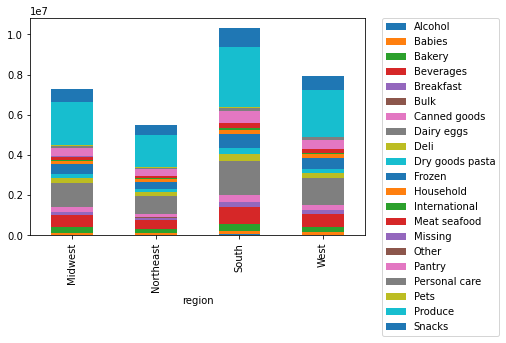

In [85]:
# Plot stacked bar chart of region/department crosstab

regional_departmental_profile = regional_departmental_profile.plot(kind = 'bar', stacked = True)

# Found code to place legend outside of chart

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [86]:
# Export chart

regional_departmental_profile.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'region_department_bar.png'))

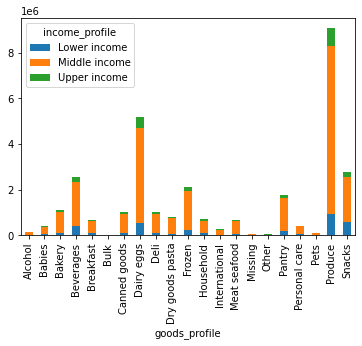

In [87]:
# Create income/goods bar chart

income_goods_profile = income_goods_profile.plot(kind = 'bar', stacked = True)

In [88]:
# Export chart

income_goods_profile.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'income_goods_bar.png'))

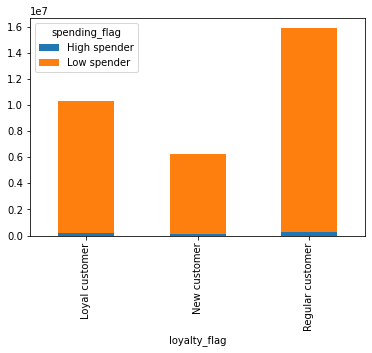

In [98]:
# Create loyalty bar chart

loyalty_distribution = loyalty_distribution.plot(kind = 'bar', stacked = True)

In [99]:
# Export

loyalty_distribution.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'loyalty_distribution_bar.png'))

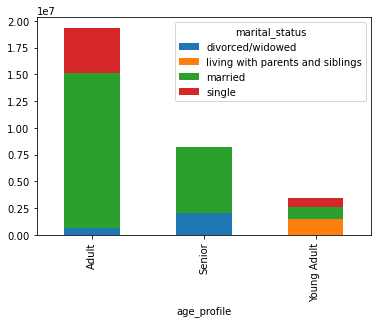

In [103]:
# Create age/fam status bar chart

age_family_status = age_family_status.plot(kind = 'bar', stacked = True)

In [104]:
# Export

age_family_status.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'age_family_staus_bar.png'))

# Question 10 - Wrapping up 

In [105]:
# Export new dataframe

df.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'instacart_final.pkl'))

In [106]:
# Export normal activity subset

df_normal_activity.to_pickle(os.path.join(path,'02. Data','Prepared Data','normal_activity_customers.pkl'))